In [1]:
import os
import time

import numpy as np
import pandas as pd

from ipywidgets import interact

import larch

from matplotlib import pyplot as plt

os.chdir('..')
os.chdir('./catxas')
import catxas

No conda env active, defaulting to base


# 1. Define where Data is Stored

In [2]:
### Modify paths inside the '' ###

# Folder containing ONLY CXAS spectra
data_dir = r'C:\Users\ashoff\OneDrive - SLAC National Accelerator Laboratory\Co-ACCESS Shared Folder\Python Scripts and GUIs\Example Data 1 - SnO2 Reduction\Raw Data'

# Mass Spec File:
MS_filename = r'C:\Users\ashoff\OneDrive - SLAC National Accelerator Laboratory\Co-ACCESS Shared Folder\Python Scripts and GUIs\Example Data 1 - SnO2 Reduction\20210614_Sievers_SnO2_H2View1.csv'

# AmP LabView File:
LV_filename = r'C:\Users\ashoff\OneDrive - SLAC National Accelerator Laboratory\Co-ACCESS Shared Folder\Python Scripts and GUIs\Example Data 1 - SnO2 Reduction\20210614_Sievers_SnO2_H2.txt'

# 2. Define BL Data Structure

In [3]:
### Define the layout of the xas data file and how spectra are calcualted
cxas_data_structure = {
    'time stamp': True,
    'time on line': 5,
    'time format': '# This Scan Create Date:\t%m/%d/%Y %I:%M:%S %p ',
    'padded scan numbers': True,
    'column names': ['Encoder', 'Energy', 'ADC_01', 'ADC_02', 'ADC_03', 'ADC_04', 'ADC_05', 'ADC_06', 'ADC_07', 'ADC_08'],
    'energy column' : 'Energy', # Energy [eV]
    'sample numerator': 'ADC_01', # I0
    'sample denominator': 'ADC_02', # I1
    'sample ln': True,
    'sample invert': False,
    'reference numerator': 'ADC_02', # I1
    'reference denominator': 'ADC_03', # I2
    'reference ln': True,
    'reference invert': False,
    'is QEXAFS': False
}

# 3. Create Experiment Class and Import  Data
## 3a. Create Experiment Class

In [4]:
# Create the Experimental Class
my_exp = catxas.Experiment("SnO2_H2Reduction")

# View keys created inside it
my_exp.__dict__.keys()

dict_keys(['name', 'process_params', 'spectra', 'analysis', 'summary'])

## 3b. Add BL Data

In [5]:
# Add raw data into spectra files
my_exp.import_spectra_data(data_dir, cxas_data_structure)

20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0002
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0003
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0004
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0005
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0006
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0007
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0008
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0009
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0010
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0011
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0012
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0013
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0014
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0015
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0016
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0017
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0018
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0019
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0020
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0021
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0022
20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0023
20210614_SnO2_H2_TPR_Sn_EXAFS_92.t

In [6]:
# Show that the spectra were added to the experiment
list(my_exp.spectra.keys())

['20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0002',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0003',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0004',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0005',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0006',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0007',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0008',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0009',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0010',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0011',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0012',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0013',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0014',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0015',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0016',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0017',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0018',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0019',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0020',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0021',
 '20210614_SnO2_H2_TPR_Sn_EXAFS_92

In [7]:
scan_name = '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0001'
scan_name2 = '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0002'

In [8]:
# Check contents of single spectrum
my_exp.spectra[scan_name].keys()

dict_keys(['XAS Data Structure', 'Time', 'BL Data'])

In [9]:
# Check xas data structure
my_exp.spectra[scan_name]['XAS Data Structure']

{'time stamp': True,
 'time on line': 5,
 'time format': '# This Scan Create Date:\t%m/%d/%Y %I:%M:%S %p ',
 'padded scan numbers': True,
 'column names': ['Encoder',
  'Energy',
  'ADC_01',
  'ADC_02',
  'ADC_03',
  'ADC_04',
  'ADC_05',
  'ADC_06',
  'ADC_07',
  'ADC_08'],
 'energy column': 'Energy',
 'sample numerator': 'ADC_01',
 'sample denominator': 'ADC_02',
 'sample ln': True,
 'sample invert': False,
 'reference numerator': 'ADC_02',
 'reference denominator': 'ADC_03',
 'reference ln': True,
 'reference invert': False,
 'is QEXAFS': False}

In [10]:
# Check contents of single spectrum BL Data
my_exp.spectra[scan_name]['BL Data']

Attribute,Type
path,str
filename,str
header,list
data,ndarray
attrs,Group
Encoder,ndarray
Energy,ndarray
ADC_01,ndarray
ADC_02,ndarray
ADC_03,ndarray


In [ ]:
# Organize Data to remove duplicate encover values
my_exp.organize_RawData(remove_duplicates=True, remove_nan_inf=False, remove_zeros=False) # remove_nan_inf & remove_zeros does not work yet

# 4. Calcualte Absorption Spectra [Sample and/or Reference]

In [11]:
# Calculates the absoprtion spectra of the sample and the reference 
my_exp.calculate_spectra(sample_spectra = True, ref_spectra = True)

In [12]:
# Check that absorption spectra were calculated
my_exp.spectra[scan_name]['Absorption Spectra']['mu Sample']

Attribute,Type
energy,ndarray
mu,ndarray
name,str


In [13]:
# Check that absorption spectra were calculated
my_exp.spectra[scan_name]['Absorption Spectra']['mu Reference']

Attribute,Type
energy,ndarray
mu,ndarray
name,str


(29150.0, 29300.0)

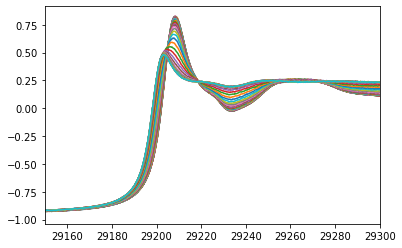

In [14]:
# Quick Visualization of Raw Data
for key in my_exp.spectra.keys():
    x = my_exp.spectra[key]['Absorption Spectra']['mu Sample'].energy
    y = my_exp.spectra[key]['Absorption Spectra']['mu Sample'].mu
    plt.plot(x,y)
    
plt.xlim([29150, 29300])

# 5. Calibrate Spectra
## 5a. Calibrate Reference Spectra

Reference Calibraiton Statistics:
Reference E0 min: 29197.43 eV
Reference E0 max: 29200.21 eV
Reference E0 mean: 29198.84 +/- 0.58 eV
Reference E0 calibrated to: 29200.00 eV
Spectra shifted by 1.16 eV




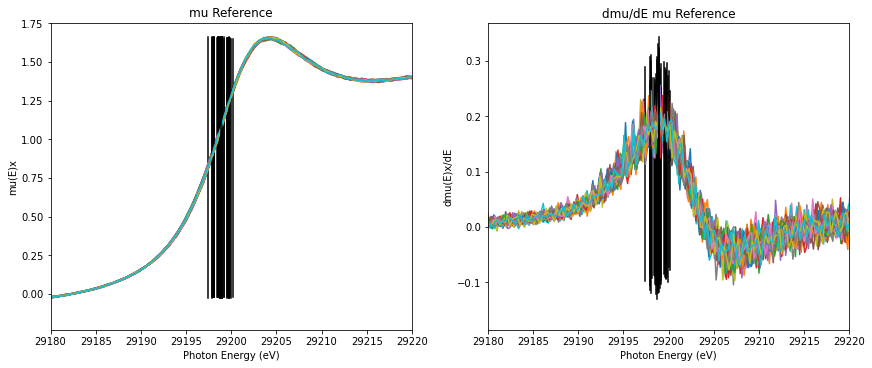

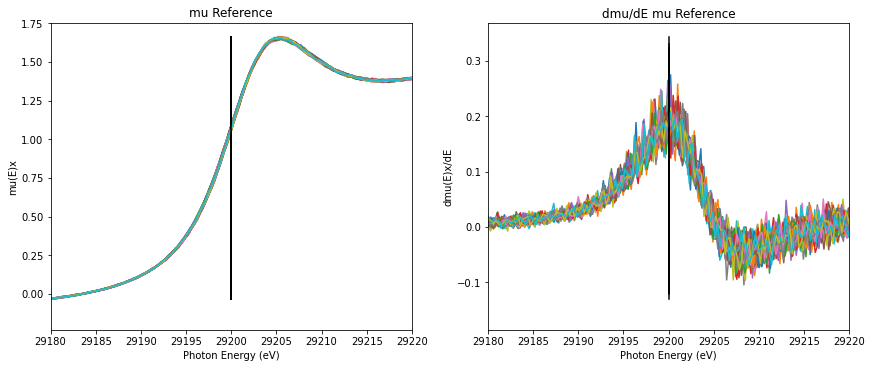

In [15]:
#Reference Calibration Energy

#### add functional to calibrate each spectra separately
Ref_E0 = 29200
my_exp.calibrate_reference_spectra(Ref_E0, use_mean = True)

## 5b. Calculate Sample E0

Sample Calibraiton Statistics:
Sample E0 min: 29199.02 eV
Sample E0 max: 29205.77 eV
Sample E0 mean: 29202.71 +/- 2.43 eV
Sample E0 set to: 29202.71 eV




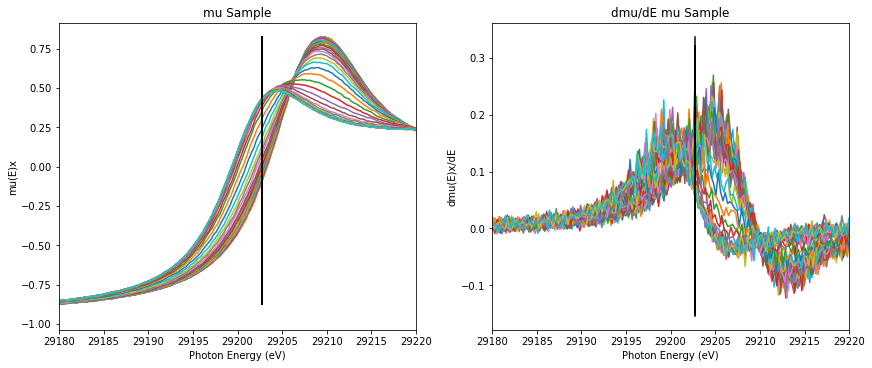

In [16]:
#Approximate edge of the Sample and determine approxiamte edge position
Samp_E0 = 29200
my_exp.find_sample_e0(Samp_E0)

In [17]:
my_exp.spectra[scan_name]['Time']

Timestamp('2021-06-14 16:33:52')

In [18]:
my_exp.spectra[scan_name]['Absorption Spectra']['mu Sample']

Attribute,Type
energy,ndarray
mu,ndarray
name,str
del_E,float64
e0,float64


# 6. Normalize Spectra
## 6a. Define normalization paramaters (can be separate for reference channel)

In [19]:
#Normalization paramters, references to E0
pre1 = -200
pre2 = -100
norm1 = 75
norm2 = 1000
nnorm = 2
make_flat = True

## 6b. Store normalization parameters into each spectrum

In [20]:
my_exp.set_normalization_parameters('mu Reference', pre1 = pre1, pre2 = pre2, 
                                    norm1 = norm1, norm2 = norm2, nnorm = nnorm, 
                                    make_flat = make_flat)

my_exp.set_normalization_parameters('mu Sample', pre1 = pre1, pre2 = pre2, 
                                    norm1 = norm1, norm2 = norm2, nnorm = nnorm, 
                                    make_flat = make_flat)



## 6c. Normalize and visualize spectra

In [21]:
# Normalize Specta
my_exp.normalize_spectra('mu Reference')
my_exp.normalize_spectra('mu Sample')

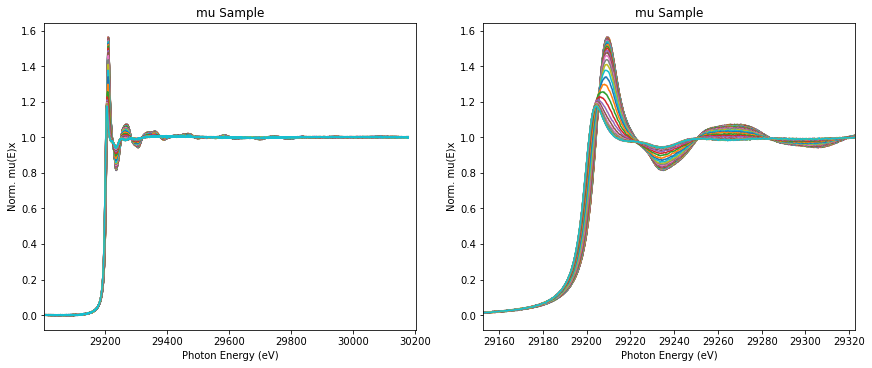

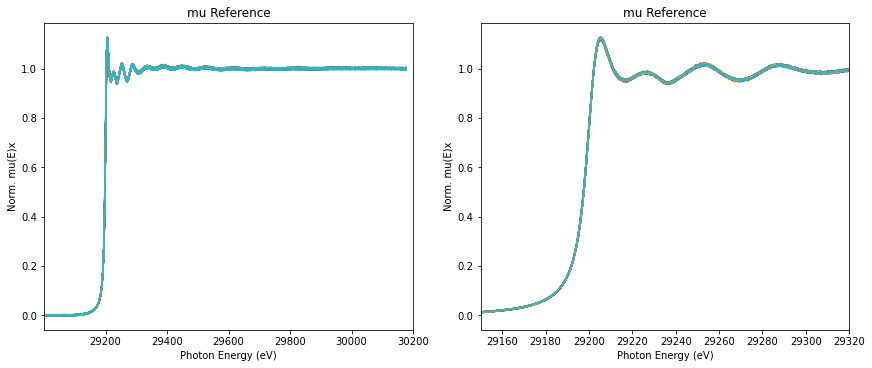

In [22]:
# Visualization of Normalized Spectra
my_exp.plot_norm_spectra(spectra = 'mu Sample')
my_exp.plot_norm_spectra(spectra = 'mu Reference')

# 7. Interpolation of XANES Spectra
## 7a. Determining how to interpolate XAS Structure

In [23]:
df = my_exp.check_Energy_Range()

Variation in starting energy points between spectra [eV]: 29005.399-29005.916
Variation in ending energy points between spectra [eV]: 30176.162-30176.610
Variation in step size of energy points between spectra [eV]: 0.235-0.235


In [24]:
# Visualize parameters for each spectra
df

,E_min,E_max,Min_E_Step,Max_E_Step,Mean_E_Step,STD_E_Step
0,29005.399023,30176.162003,0.000000,0.364590,0.235140,0.052696
1,29005.812410,30176.609650,-0.055956,0.365132,0.235147,0.052706
2,29005.709062,30176.553693,0.000000,0.365202,0.235157,0.052787
3,29005.657389,30176.441781,-0.055956,0.365273,0.235144,0.052847
4,29005.760736,30176.497737,0.000000,0.364957,0.235135,0.052711
5,29005.760736,30176.497737,0.000000,0.364634,0.235135,0.052651
6,29005.760736,30176.497737,-0.055955,0.365138,0.235135,0.052681
7,29005.864084,30176.609650,0.000000,0.365270,0.235137,0.052590
8,29005.760736,30176.497737,-0.055956,0.364773,0.235135,0.052730
9,29005.760736,30176.497737,-0.055956,0.364817,0.235135,0.052739


## 7b. Interpolate XANES Spectra onto defined grid

In [25]:
# Set the energy range and step size to interpolate onto
start = 29050
stop = 29450
step = 0.25

# Interpolate Spectra
result = my_exp.interpolate_spectra(start, stop, step, x_axis = 'energy', sample = 'mu Sample')

<AxesSubplot:xlabel='energy'>

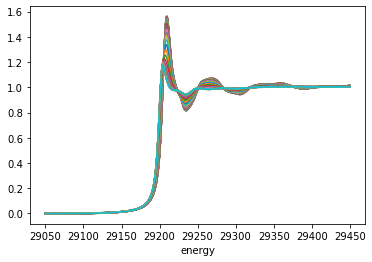

In [26]:
# Visualzie Interpolated Spectra
result.plot(legend=False)

In [27]:
# Inspect DataFrame containing interpoalted spectra
result

,2021-06-14 16:33:52,2021-06-14 16:35:37,2021-06-14 16:37:23,2021-06-14 16:39:11,2021-06-14 16:40:57,2021-06-14 16:42:42,2021-06-14 16:44:27,2021-06-14 16:46:13,2021-06-14 16:47:59,2021-06-14 16:49:44,...,2021-06-14 17:44:29,2021-06-14 17:46:15,2021-06-14 17:48:01,2021-06-14 17:49:47,2021-06-14 17:51:32,2021-06-14 17:53:18,2021-06-14 17:55:04,2021-06-14 17:56:50,2021-06-14 17:58:36,2021-06-14 18:00:22
energy,,,,,,,,,,,,,,,,,,,,,
29050.00,0.000514,0.000546,-0.001553,-0.000114,0.000161,-0.000634,-0.002264,0.000557,0.000471,-0.004015,...,0.000302,-0.000618,-0.000539,0.000912,-0.000228,-0.000048,0.000115,-0.000825,-0.000613,-0.000686
29050.25,0.000836,0.001078,-0.000574,0.001607,-0.000725,-0.001600,0.000261,-0.000129,-0.000802,-0.003397,...,-0.000618,-0.000628,-0.000764,0.000413,-0.000473,0.000735,0.000164,-0.000097,-0.000106,-0.001239
29050.50,-0.000393,0.000450,-0.000030,0.000103,-0.000079,-0.002177,0.000390,-0.000194,-0.001681,-0.000487,...,-0.000466,-0.000905,-0.001337,-0.000789,-0.000881,0.000574,-0.000407,0.000332,-0.001294,-0.001213
29050.75,-0.000199,-0.000202,0.000433,-0.000276,-0.000296,-0.001905,0.000583,-0.000590,-0.001930,0.000767,...,0.000348,-0.000216,-0.000914,-0.000775,-0.001991,-0.000688,-0.000106,-0.001530,-0.000715,-0.000416
29051.00,0.000003,-0.001819,0.000735,0.000142,-0.001725,-0.001119,0.001308,0.000510,-0.001820,-0.000523,...,0.000299,-0.000160,0.000784,-0.001603,-0.000906,-0.000479,-0.001425,-0.001164,-0.000775,-0.000447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29449.00,1.012274,1.013345,1.009649,1.014841,1.015265,1.015226,1.011949,1.011772,1.011139,1.011486,...,1.002873,1.004369,1.003256,1.004022,1.004321,1.003048,1.005268,1.004530,1.004789,1.003835
29449.25,1.012161,1.012156,1.010749,1.011634,1.013890,1.013533,1.012526,1.011959,1.011674,1.011672,...,1.003451,1.004190,1.005284,1.004118,1.005318,1.002558,1.004366,1.004104,1.002945,1.002291
29449.50,1.011062,1.011636,1.013631,1.014821,1.012382,1.011070,1.013508,1.013486,1.011308,1.011254,...,1.005265,1.003956,1.005985,1.002345,1.004374,1.003419,1.006027,1.003231,1.003599,1.004984


## 7c. Save the dataframe to a csv file 

In [28]:
# Define path and filename to save Normalized XANES:
output_dir = r'C:\Users\ashoff\OneDrive - SLAC National Accelerator Laboratory\Co-ACCESS Shared Folder\Python Scripts and GUIs\Example Data 1 - SnO2 Reduction'
result_name = 'NormXANES'

# Save Normalized XANES:
result.to_csv(os.path.join(output_dir,result_name + '.csv'), sep=',', header=True, index=True)